<a href="https://colab.research.google.com/github/Redcoder815/Deep_Learning_PyTorch/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import ssl

ssl._create_default_https_context = ssl._create_unverified_context
plt.rcParams['figure.figsize'] = 14, 6

normalize_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])

train_dataset = torchvision.datasets.CIFAR10(
    root="./CIFAR10/train", train=True, transform=normalize_transform, download=True)
test_dataset = torchvision.datasets.CIFAR10(
    root="./CIFAR10/test", train=False, transform=normalize_transform, download=True)

batch_size = 128
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)

100%|██████████| 170M/170M [00:02<00:00, 79.6MB/s]
100%|██████████| 170M/170M [00:01<00:00, 92.2MB/s]


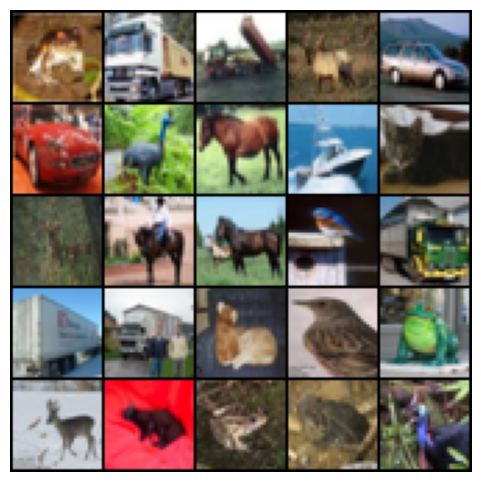

In [2]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
plt.imshow(np.transpose(torchvision.utils.make_grid(
    images[:25], normalize=True, padding=1, nrow=5).numpy(), (1, 2, 0)))
plt.axis('off')
plt.show()

[0 1 2 3 4 5 6 7 8 9] [5000 5000 5000 5000 5000 5000 5000 5000 5000 5000]
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


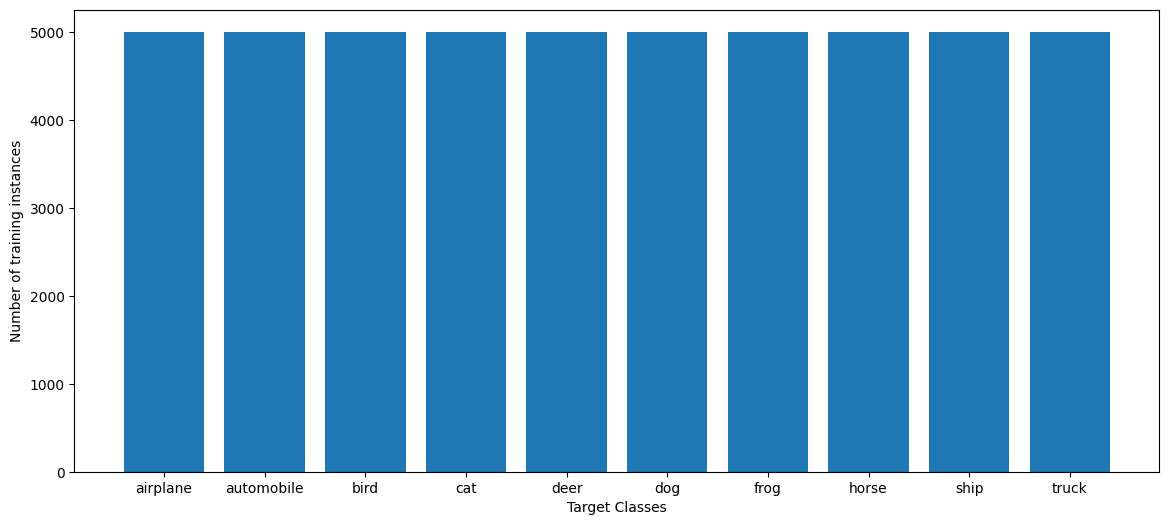

In [11]:
classes = []
for batch_idx, data in enumerate(train_loader):
    x, y = data
    classes.extend(y.tolist())

unique, counts = np.unique(classes, return_counts=True)
print(unique, counts)
names = list(test_dataset.class_to_idx.keys())
print(names)
plt.bar(names, counts)
plt.xlabel("Target Classes")
plt.ylabel("Number of training instances")
plt.show()

In [4]:
class CNN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=3, out_channels=32,
                            kernel_size=3, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2),
            torch.nn.Conv2d(in_channels=32, out_channels=64,
                            kernel_size=3, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2),
            torch.nn.Conv2d(in_channels=64, out_channels=64,
                            kernel_size=3, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2),
            torch.nn.Flatten(),
            torch.nn.Linear(64 * 4 * 4, 512),
            torch.nn.ReLU(),
            torch.nn.Linear(512, 10)
        )

    def forward(self, x):
        return self.model(x)

In [ ]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F


# class CNN(nn.Module):
#     def __init__(self):
#         super().__init__()

#         # --- Conv1: 3 → 32 ---
#         self.conv1_weight = nn.Parameter(torch.randn(32, 3, 3, 3) * 0.02)
#         self.conv1_bias   = nn.Parameter(torch.zeros(32))

#         # --- Conv2: 32 → 64 ---
#         self.conv2_weight = nn.Parameter(torch.randn(64, 32, 3, 3) * 0.02)
#         self.conv2_bias   = nn.Parameter(torch.zeros(64))

#         # --- Conv3: 64 → 64 ---
#         self.conv3_weight = nn.Parameter(torch.randn(64, 64, 3, 3) * 0.02)
#         self.conv3_bias   = nn.Parameter(torch.zeros(64))

#         # After 3× MaxPool2d(2), input 32×32 → 4×4
#         # So flattened size = 64 * 4 * 4
#         self.fc1_weight = nn.Parameter(torch.randn(512, 64 * 4 * 4) * 0.02)
#         self.fc1_bias   = nn.Parameter(torch.zeros(512))

#         self.fc2_weight = nn.Parameter(torch.randn(10, 512) * 0.02)
#         self.fc2_bias   = nn.Parameter(torch.zeros(10))


#     def forward(self, x):

#         # --- Conv1 ---
#         x = F.conv2d(x, self.conv1_weight, self.conv1_bias, padding=1)
#         x = F.relu(x)
#         x = F.max_pool2d(x, 2)

#         # --- Conv2 ---
#         x = F.conv2d(x, self.conv2_weight, self.conv2_bias, padding=1)
#         x = F.relu(x)
#         x = F.max_pool2d(x, 2)

#         # --- Conv3 ---
#         x = F.conv2d(x, self.conv3_weight, self.conv3_bias, padding=1)
#         x = F.relu(x)
#         x = F.max_pool2d(x, 2)

#         # Flatten
#         x = x.view(x.size(0), -1)

#         # --- FC1 ---
#         x = F.linear(x, self.fc1_weight, self.fc1_bias)
#         x = F.relu(x)

#         # --- FC2 ---
#         x = F.linear(x, self.fc2_weight, self.fc2_bias)

#         return x

In [5]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = CNN().to(device)

num_epochs = 5
learning_rate = 0.001
weight_decay = 0.01
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(
    model.parameters(), lr=learning_rate, weight_decay=weight_decay)

In [6]:
train_loss_list = []
for epoch in range(num_epochs):
    print(f'Epoch {epoch+1}/{num_epochs}:', end=' ')
    train_loss = 0
    model.train()
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss_list.append(train_loss / len(train_loader))
    print(f"Training loss = {train_loss_list[-1]}")

Epoch 1/5: Training loss = 1.6462696278491593
Epoch 2/5: Training loss = 1.36009494361975
Epoch 3/5: Training loss = 1.254124705291465
Epoch 4/5: Training loss = 1.1711399190871001
Epoch 5/5: Training loss = 1.101569137000062


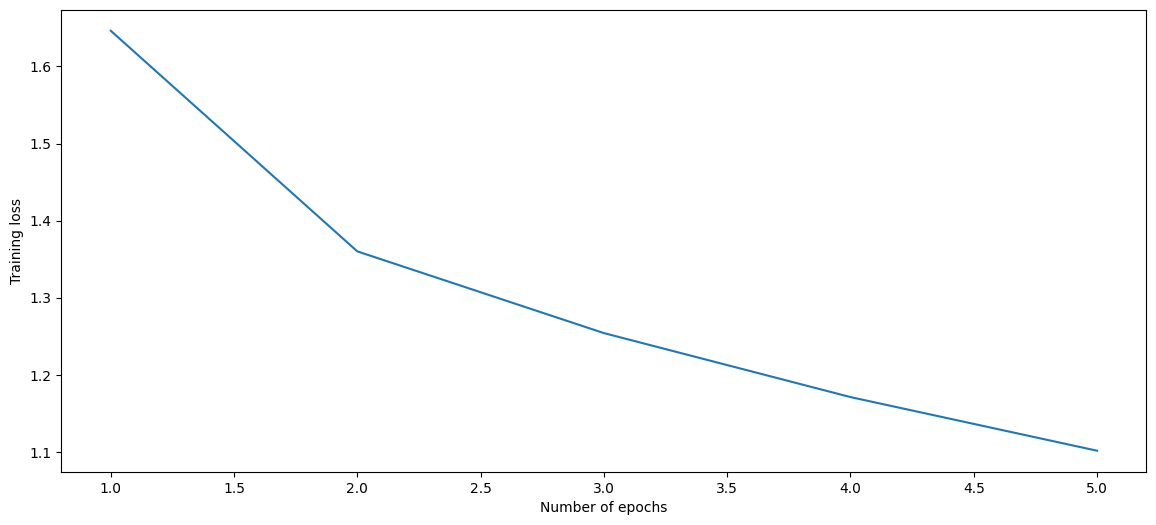

In [7]:
plt.plot(range(1, num_epochs + 1), train_loss_list)
plt.xlabel("Number of epochs")
plt.ylabel("Training loss")
plt.show()

In [8]:
test_acc = 0
model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        y_true = labels.to(device)
        outputs = model(images)
        _, y_pred = torch.max(outputs.data, 1)
        test_acc += (y_pred == y_true).sum().item()

print(f"Test set accuracy = {100 * test_acc / len(test_dataset)} %")

Test set accuracy = 63.66 %


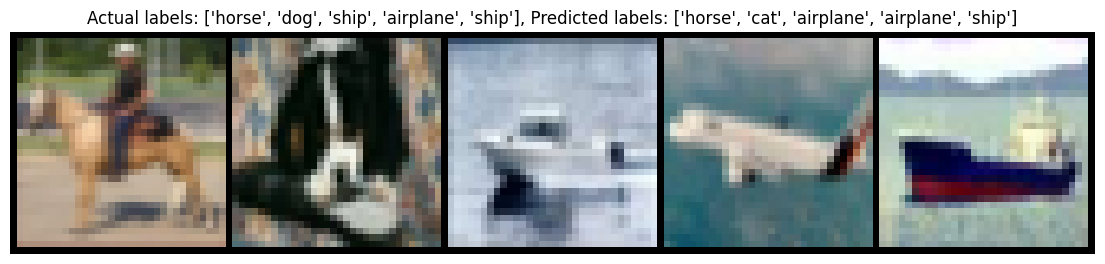

In [9]:
num_images = 5
y_true_name = [names[y_true[idx]] for idx in range(num_images)]
y_pred_name = [names[y_pred[idx]] for idx in range(num_images)]
title = f"Actual labels: {y_true_name}, Predicted labels: {y_pred_name}"

plt.imshow(np.transpose(torchvision.utils.make_grid(
    images[:num_images].cpu(), normalize=True, padding=1).numpy(), (1, 2, 0)))
plt.title(title)
plt.axis("off")
plt.show()

Using nn.Parameter

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.ToTensor(),              # [0,1]
    transforms.Normalize((0.1307,), (0.3081,))  # MNIST stats
])

train_ds = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_ds  = datasets.MNIST(root="./data", train=False, download=True, transform=transform)

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_ds, batch_size=256, shuffle=False)

100%|██████████| 9.91M/9.91M [00:00<00:00, 127MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 33.9MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 77.6MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 10.1MB/s]


how we arrive at 16x5x5.

Your model processes single-channel MNIST images, which are 28x28 pixels. The batch dimension N will remain constant, so we'll focus on (Channels, Height, Width).

Starting Input:

An MNIST image is (1, 28, 28): 1 channel, 28 pixels high, 28 pixels wide.
Layer 1: First Convolutional Block

F.conv2d(x, self.W1, self.b1, stride=1, padding=0)

self.W1 is defined as (8, 1, 3, 3). This means in_channels=1, out_channels=8, kernel_size=3x3.
stride=1, padding=0
The formula for output height/width with padding=0 and stride=1 is: output_dim = input_dim - kernel_size + 1
Height: 28 - 3 + 1 = 26
Width: 28 - 3 + 1 = 26
Channels: Changes from 1 to 8 (the out_channels).
After conv1: The feature map is (N, 8, 26, 26).
F.relu(x): Applies ReLU activation. This doesn't change the dimensions.

After ReLU: The feature map is still (N, 8, 26, 26).
F.max_pool2d(x, 2)

kernel_size=2. This typically means a 2x2 pooling window with a stride of 2.
The formula for output height/width with pooling is output_dim = input_dim / pool_size (assuming integer division for simplicity, or ceil for exact calculation when not perfectly divisible).
Height: 26 / 2 = 13
Width: 26 / 2 = 13
Channels: Remains 8.
After max_pool2d (first block): The feature map is (N, 8, 13, 13).
Layer 2: Second Convolutional Block

F.conv2d(x, self.W2, self.b2, stride=1, padding=0)

self.W2 is defined as (16, 8, 3, 3). This means in_channels=8, out_channels=16, kernel_size=3x3.
The input to this conv layer is (N, 8, 13, 13).
Height: 13 - 3 + 1 = 11
Width: 13 - 3 + 1 = 11
Channels: Changes from 8 to 16.
After conv2: The feature map is (N, 16, 11, 11).
F.relu(x): Applies ReLU activation. No dimension change.

After ReLU: The feature map is still (N, 16, 11, 11).
F.max_pool2d(x, 2)

kernel_size=2.
Height: 11 / 2 = 5 (integer division, or floor(11/2) = 5).
Width: 11 / 2 = 5 (integer division, or floor(11/2) = 5).
Channels: Remains 16.
After max_pool2d (second block): The feature map is (N, 16, 5, 5).
This (N, 16, 5, 5) is the output shape of the feature maps before they are flattened (x = x.view(x.size(0), -1)). When flattened, the 16 * 5 * 5 dimensions are multiplied together, resulting in 400 features per image, which then feed into self.W3.



In [13]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        # conv1: in_ch=1, out_ch=8, k=3
        self.W1 = nn.Parameter(torch.randn(8, 1, 3, 3) * 0.1)
        self.b1 = nn.Parameter(torch.zeros(8))

        # conv2: in_ch=8, out_ch=16, k=3
        self.W2 = nn.Parameter(torch.randn(16, 8, 3, 3) * 0.1)
        self.b2 = nn.Parameter(torch.zeros(16))

        # after two convs + 2x2 maxpool each, MNIST 28x28 becomes:
        # 28 -> conv(3) -> 26 -> pool(2) -> 13
        # 13 -> conv(3) -> 11 -> pool(2) -> 5
        # so feature map: 16 x 5 x 5 = 400
        self.W3 = nn.Parameter(torch.randn(400, 10) * 0.1)
        self.b3 = nn.Parameter(torch.zeros(10))

    def forward(self, x):
        # x: (N, 1, 28, 28)
        # conv1
        x = F.conv2d(x, self.W1, self.b1, stride=1, padding=0)  # (N, 8, 26, 26)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)                                  # (N, 8, 13, 13)

        # conv2
        x = F.conv2d(x, self.W2, self.b2, stride=1, padding=0)  # (N, 16, 11, 11)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)                                  # (N, 16, 5, 5)

        # flatten
        x = x.view(x.size(0), -1)                               # (N, 400)

        # fully connected: x @ W3 + b3
        logits = x @ self.W3 + self.b3                          # (N, 10)
        return logits

In [14]:
model = SimpleCNN().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = nn.CrossEntropyLoss()

def train_epoch(model, loader):
    model.train()
    total_loss, total_correct, total_samples = 0.0, 0, 0

    for x, y in loader:
        x, y = x.to(device), y.to(device)

        logits = model(x)
        loss = criterion(logits, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * x.size(0)
        preds = logits.argmax(dim=1)
        total_correct += (preds == y).sum().item()
        total_samples += x.size(0)

    return total_loss / total_samples, total_correct / total_samples

def eval_epoch(model, loader):
    model.eval()
    total_loss, total_correct, total_samples = 0.0, 0, 0

    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            logits = model(x)
            loss = criterion(logits, y)

            total_loss += loss.item() * x.size(0)
            preds = logits.argmax(dim=1)
            total_correct += (preds == y).sum().item()
            total_samples += x.size(0)

    return total_loss / total_samples, total_correct / total_samples

for epoch in range(1, 6):
    train_loss, train_acc = train_epoch(model, train_loader)
    test_loss, test_acc = eval_epoch(model, test_loader)
    print(f"Epoch {epoch}: "
          f"train_loss={train_loss:.4f}, train_acc={train_acc:.4f}, "
          f"test_loss={test_loss:.4f}, test_acc={test_acc:.4f}")

Epoch 1: train_loss=0.2447, train_acc=0.9241, test_loss=0.0841, test_acc=0.9754
Epoch 2: train_loss=0.0829, train_acc=0.9740, test_loss=0.0651, test_acc=0.9781
Epoch 3: train_loss=0.0629, train_acc=0.9803, test_loss=0.0559, test_acc=0.9816
Epoch 4: train_loss=0.0549, train_acc=0.9827, test_loss=0.0519, test_acc=0.9850
Epoch 5: train_loss=0.0477, train_acc=0.9853, test_loss=0.0527, test_acc=0.9827
